In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys,os
sys.path.append("/projects/computer-vision/")

In [3]:
import utils.cv_utils as cvu
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
img = cv.imread('../opencv-course/Resources/Photos/park.jpg')

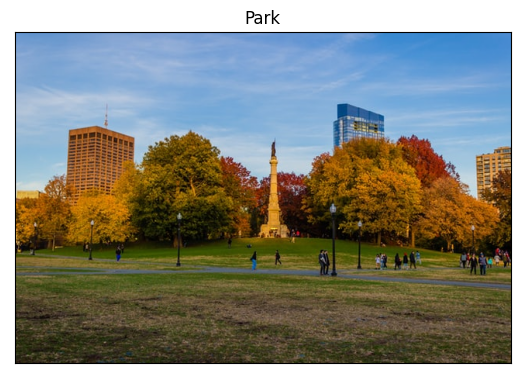

In [5]:
cvu.cv_imshow('Park', img)

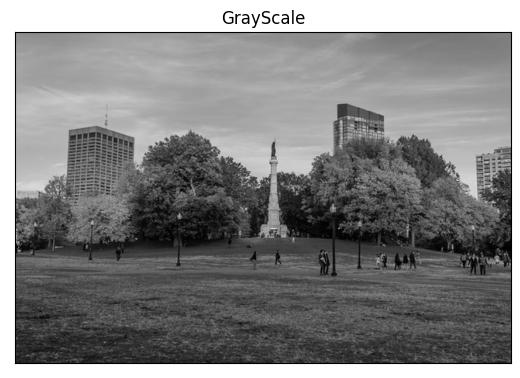

In [6]:
# To grayscale:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cvu.cv_imshow('GrayScale', gray)

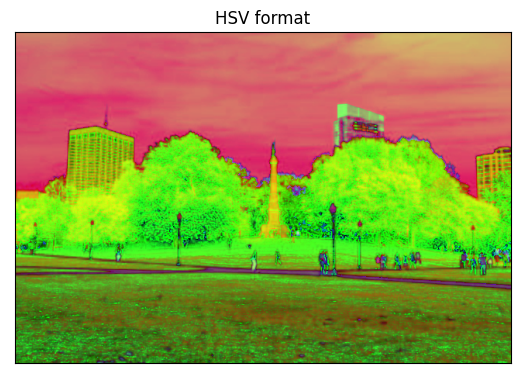

In [7]:
# To HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cvu.cv_imshow('HSV format', hsv)

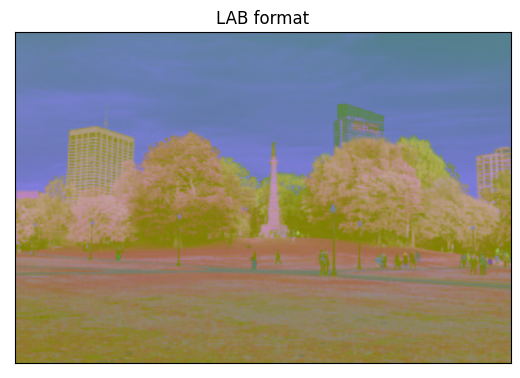

In [8]:
# lab formation
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cvu.cv_imshow("LAB format", lab)

In [9]:
# to rgb (matplotlib standard) see cvu.cv_imshow

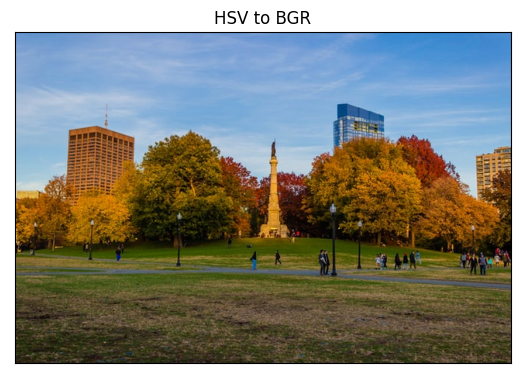

In [10]:
# HSV to BGR
hsv_bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
cvu.cv_imshow("HSV to BGR", hsv_bgr)

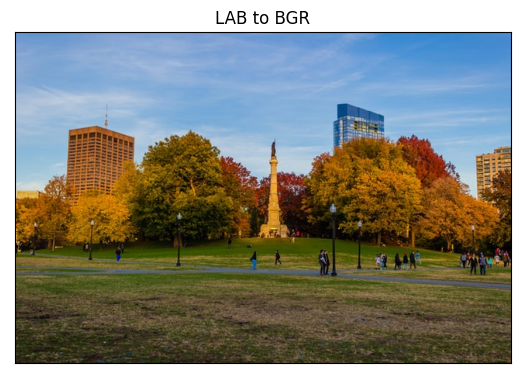

In [11]:
# HSV to BGR
lab_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
cvu.cv_imshow("LAB to BGR", lab_bgr)

In [12]:
# HSV, LAB are reversible
# to convert grayscale to LAB you have to turn into BGR and BGR to LAB

### Color channels

In [13]:
# Channels are dimension of color of images

(427, 640) (427, 640) (427, 640)


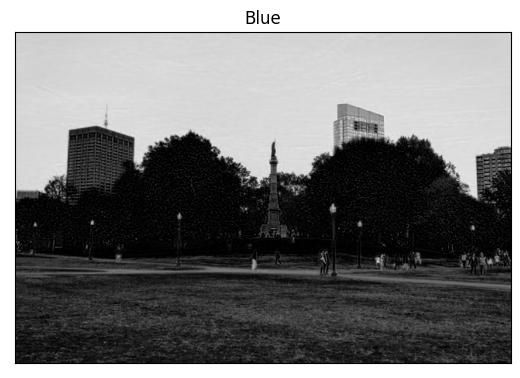

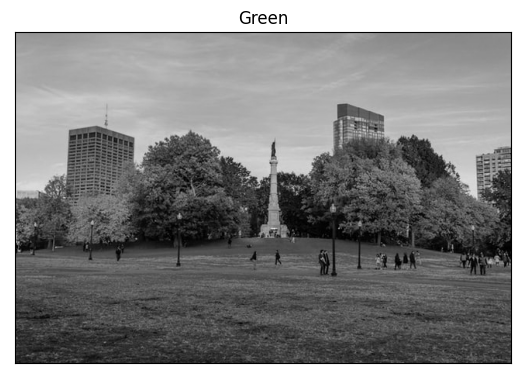

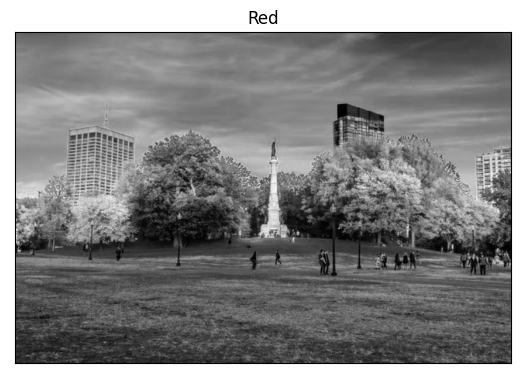

In [14]:
# Split the image into color channels
b, g, r = cv.split(img)
print(b.shape, g.shape, r.shape)
cvu.cv_imshow('Blue', b)
cvu.cv_imshow('Green', g)
cvu.cv_imshow('Red', r)

# Show the pixel density per channel

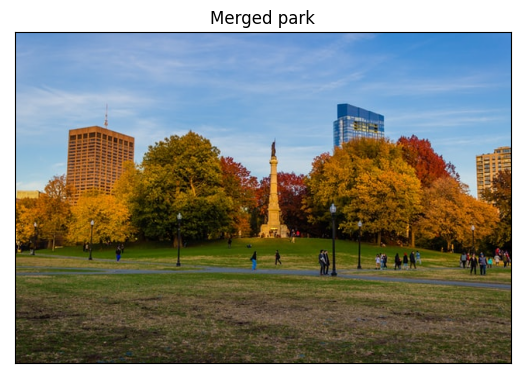

In [15]:
# Merge colors channels together
merged = cv.merge([b, g, r])
cvu.cv_imshow('Merged park', merged)

In [16]:
# Reconstructing the image and blank channels minus one

In [17]:
blank = np.zeros(b.shape, dtype=np.uint8)

In [18]:
blue = cv.merge([b, blank, blank])
green = cv.merge([blank, g, blank])
red = cv.merge([blank, blank, r])

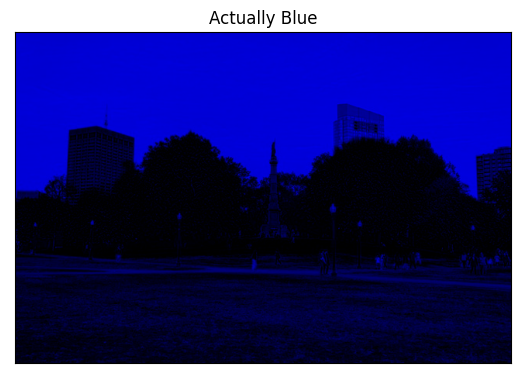

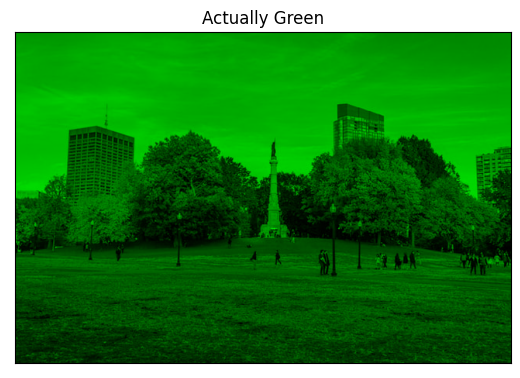

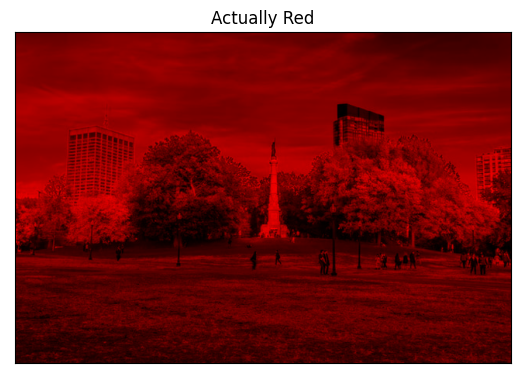

In [19]:
cvu.cv_imshow('Actually Blue', blue)
cvu.cv_imshow('Actually Green', green)
cvu.cv_imshow('Actually Red', red)

### Smoothing & Blurring

In [20]:
# We do this usually when it has a lot for noise

#### Different techs for different purposes
Blur concepts: 
- Kernel: window over the image on which the blurring operation is applied (max, mean, etc...). The middle pixel is affected by a method apply to surroundings

In [21]:
average = cv.blur(img, (7, 7))

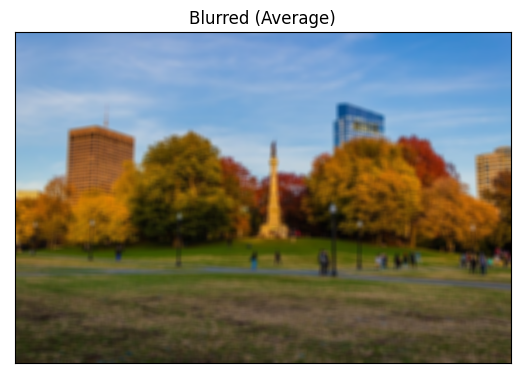

In [22]:
cvu.cv_imshow('Blurred (Average)', average)

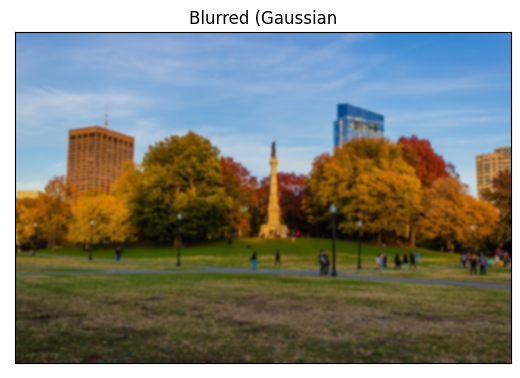

In [23]:
# Gaussian blur:
# Blur Method is weighted average. (TDOD: check how the weights are generated)
gauss = cv.GaussianBlur(img, (7, 7), 0) #(sigmaX = std in the x direction)
cvu.cv_imshow("Blurred (Gaussian", gauss) 
# Make it less blurry depending on the weights

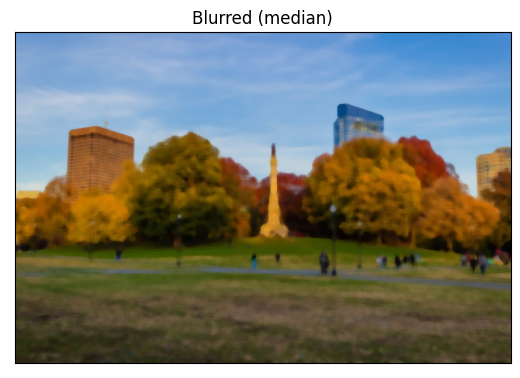

In [24]:
# Median Blur (o surroundings). Tends to be more effective than Gauss or average at remove noise
#Is not meant for high kernel size like 5 or 7. better with 3 (maybe)
median = cv.medianBlur(img, 7)
cvu.cv_imshow('Blurred (median)', median)

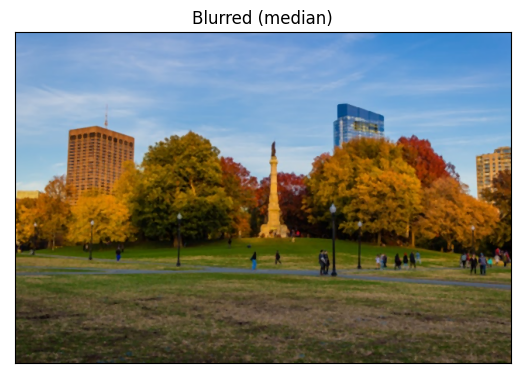

In [25]:
median = cv.medianBlur(img, 3)
cvu.cv_imshow('Blurred (median)', median)

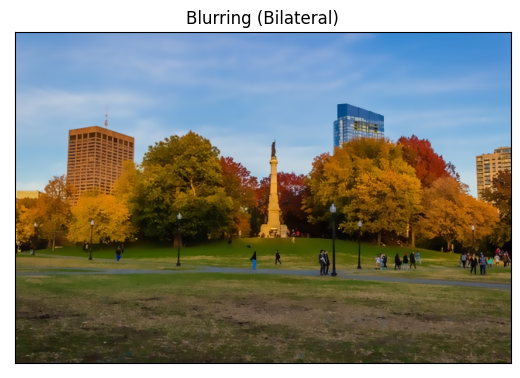

In [26]:
# Bilateral blurring
# Retains the edge in the image
bilateral = cv.bilateralFilter(src=img, d=10, sigmaColor=35, sigmaSpace=25) # higher values might get u and versy smudged image. beware
cvu.cv_imshow("Blurring (Bilateral)", bilateral)
# more colors considered in the blurring, pixels further with influence the blurring 

### BITWISE OPERATORS

In [27]:
blank = np.zeros((400, 400), dtype=np.uint8)
rectangle = cv.rectangle(blank.copy(), (30, 30), (370, 370), 255, -1)
circle = cv.circle(blank.copy(), (200, 200), 200, 255, -1)

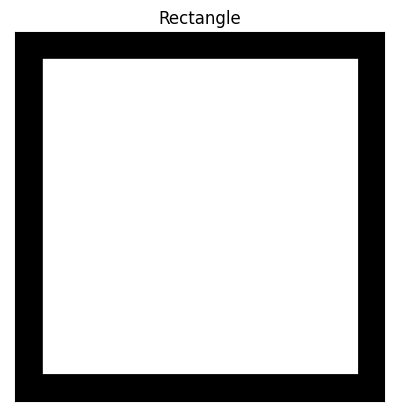

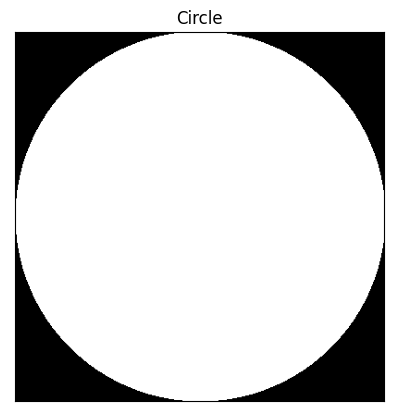

In [28]:
cvu.cv_imshow('Rectangle', rectangle)
cvu.cv_imshow('Circle', circle)

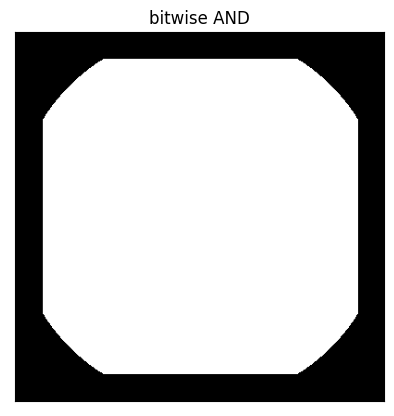

In [29]:
bitwiseand = cv.bitwise_and(rectangle, circle) #  useful to replicate the concept of mayers
cvu.cv_imshow("bitwise AND", bitwiseand)

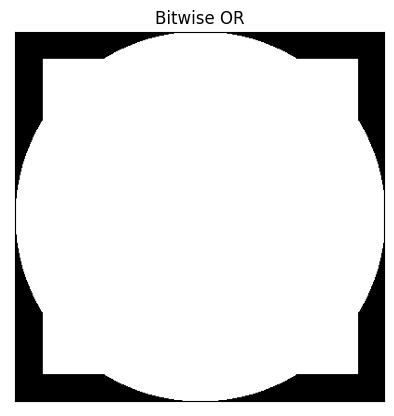

In [30]:
cvu.cv_imshow("Bitwise OR", cv.bitwise_or(rectangle, circle))

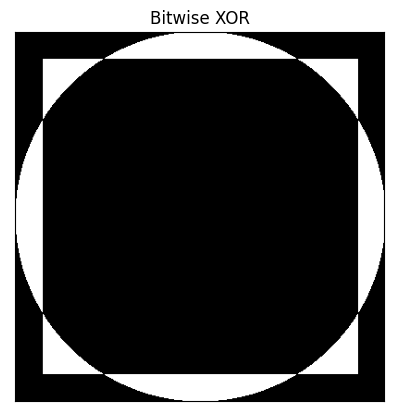

In [31]:
cvu.cv_imshow("Bitwise XOR", cv.bitwise_xor(rectangle, circle))

In [32]:
# obviously bitwise_not

### Masks

In [33]:
img = cv.imread("../opencv-course/Resources/Photos/cats.jpg")

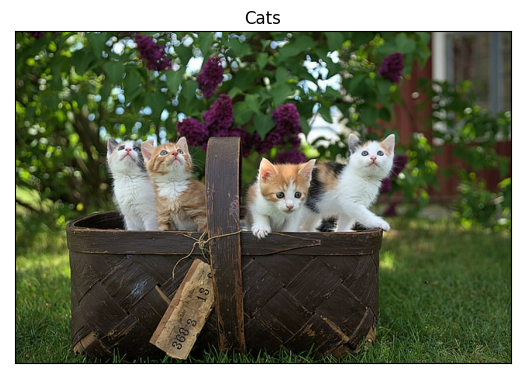

In [34]:
cvu.cv_imshow('Cats', img)

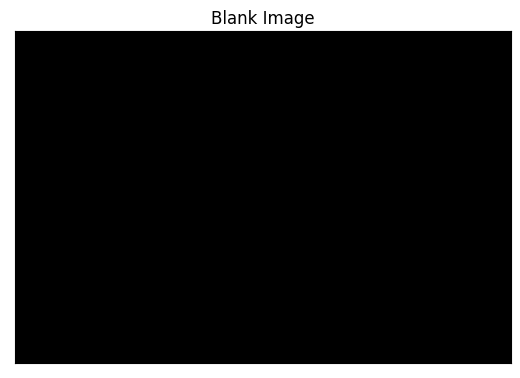

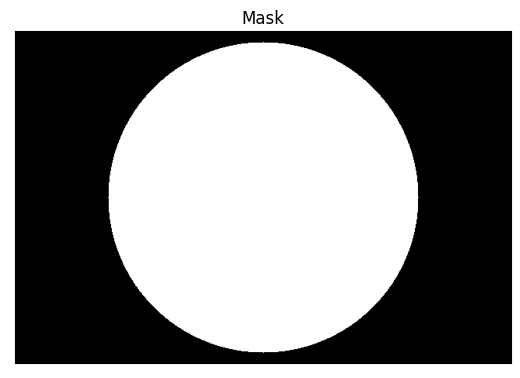

In [35]:
# building the mask
blank = np.zeros(img.shape[:2], dtype=np.uint8)
cvu.cv_imshow('Blank Image', blank)
mask = cv.circle(blank.copy(), (img.shape[1]//2, img.shape[0]//2), 200, 255, -1)
cvu.cv_imshow("Mask", mask)

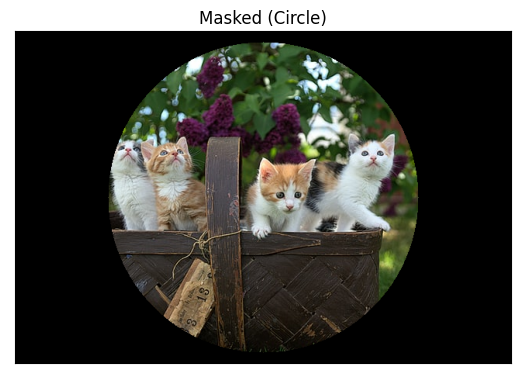

In [36]:
masked = cv.bitwise_and(img, img, mask=mask)
cvu.cv_imshow('Masked (Circle)', masked)

In [37]:
rectangle = cv.rectangle(blank.copy(), (0, 0), (img.shape[1]//2, img.shape[1]//2), 255, -1)  

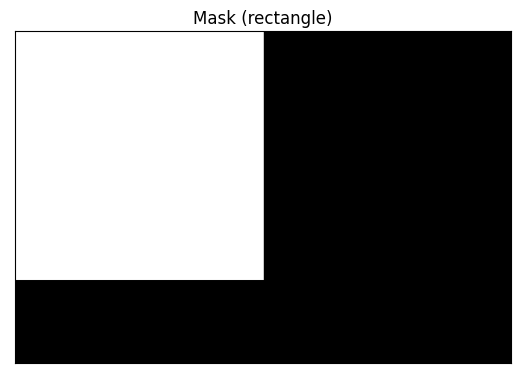

In [38]:
cvu.cv_imshow("Mask (rectangle)", rectangle)

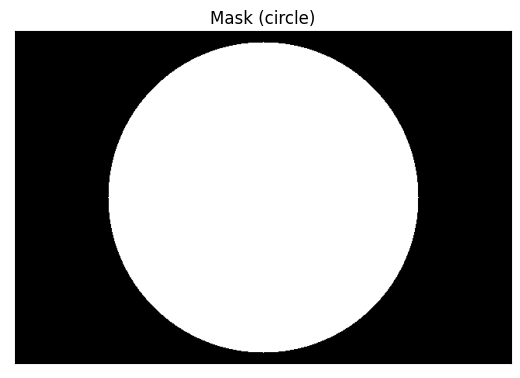

In [39]:
cvu.cv_imshow("Mask (circle)", mask)

In [40]:
mask = cv.bitwise_and(mask, rectangle)

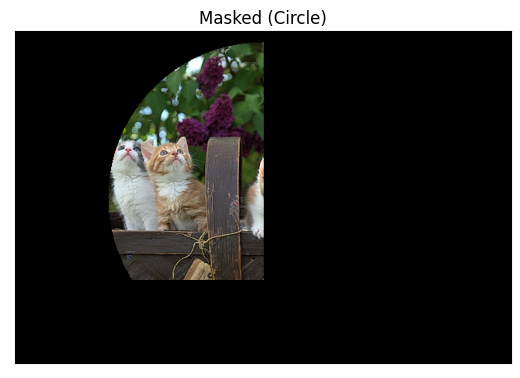

In [41]:
masked = cv.bitwise_and(img, img, mask=mask)
cvu.cv_imshow('Masked (Circle)', masked)

### Histograms

In [42]:
# goal: visualize the distribution of pixel intensity

In [43]:
#Histograms for grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_hist = cv.calcHist(images=[gray], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

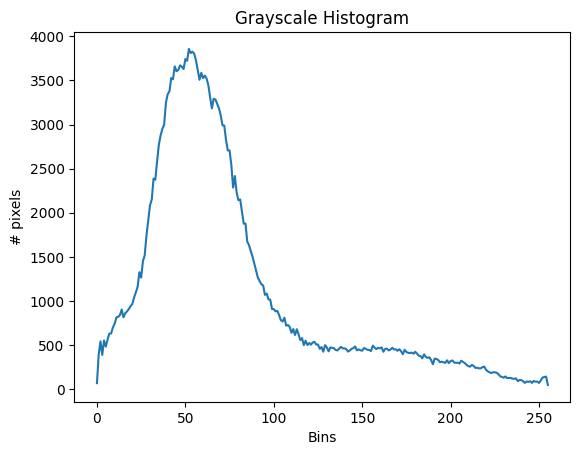

In [44]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel('Bins')
plt.ylabel('# pixels')
plt.plot(gray_hist)
plt.show()

peak at intensity of 50 = lot of dark pixel (dark because this is still grayscale histogram)

In [45]:
blank = np.zeros(img.shape[:2], dtype=np.uint8)

In [46]:
mask = cv.circle(blank.copy(), (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)

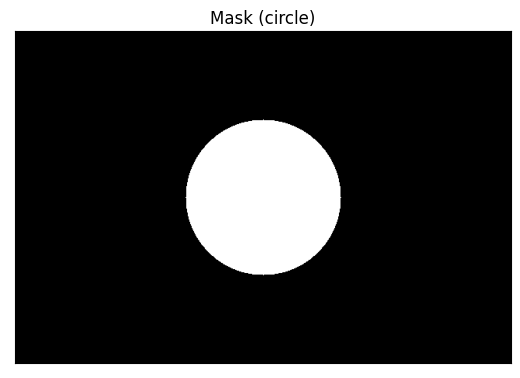

In [47]:
cvu.cv_imshow("Mask (circle)", mask)

In [48]:
gray_hist_masked = cv.calcHist([gray], [0], mask, [256], [0, 256])

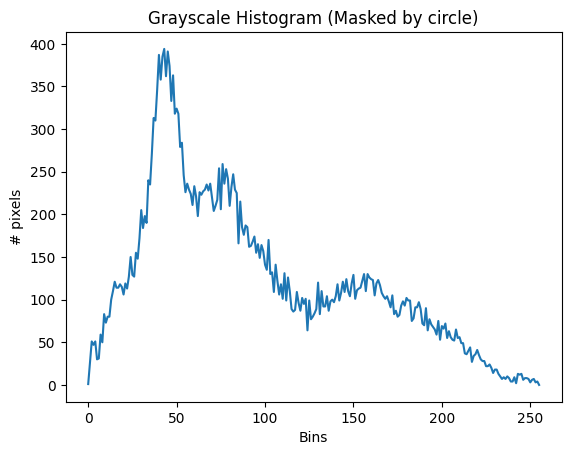

In [49]:
plt.figure()
plt.title("Grayscale Histogram (Masked by circle)")
plt.xlabel('Bins')
plt.ylabel('# pixels')
plt.plot(gray_hist_masked)
plt.show()

In [50]:
gray_masked = cv.bitwise_and(gray, gray, mask=mask)

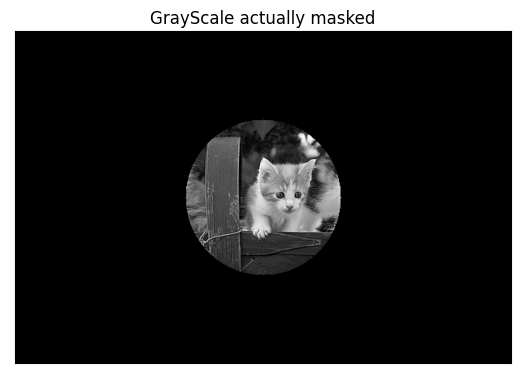

In [51]:
cvu.cv_imshow("GrayScale actually masked", gray_masked)

In [52]:
gray_hist_masked = cv.calcHist([gray_masked], [0], gray_masked, [256], [0, 256])

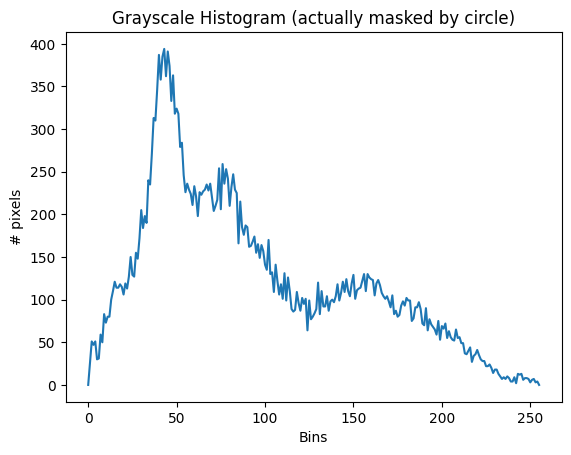

In [53]:
plt.figure()
plt.title("Grayscale Histogram (actually masked by circle)")
plt.xlabel('Bins')
plt.ylabel('# pixels')
plt.plot(gray_hist_masked)
plt.show()

In [54]:
# Colored images histograms

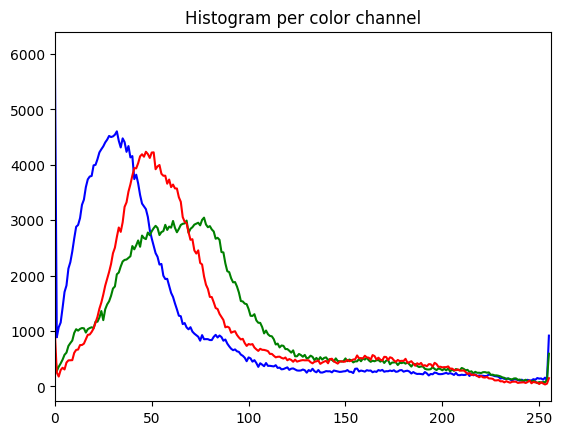

In [55]:
plt.title("Histogram per color channel")
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

plt.show()

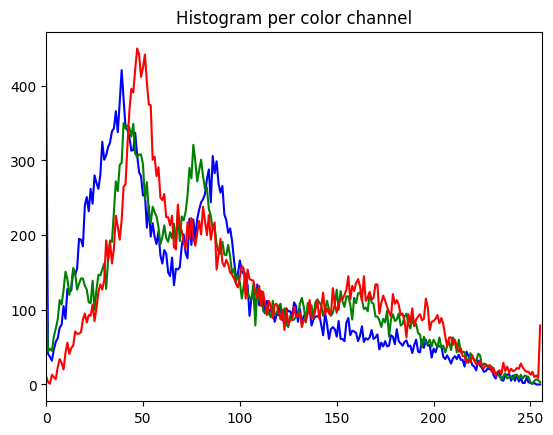

In [56]:
plt.title("Histogram per color channel")
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], mask, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

plt.show()

### Thresholding

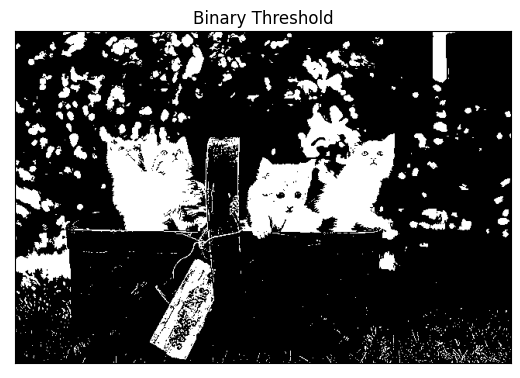

In [57]:
# Binarization of an image
# Simple thresholding
th, thresh_img = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)
cvu.cv_imshow("Binary Threshold", thresh_img)

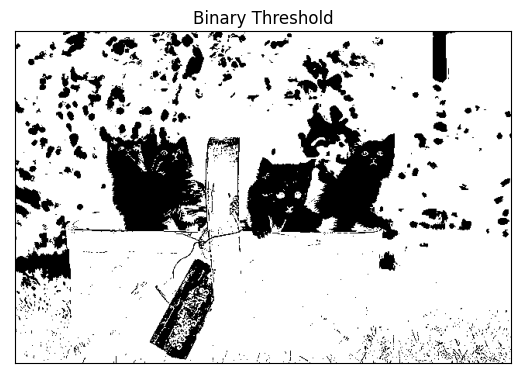

In [58]:
th, thresh_img = cv.threshold(gray, 100, 255, cv.THRESH_BINARY_INV)
cvu.cv_imshow("Binary Threshold", thresh_img)

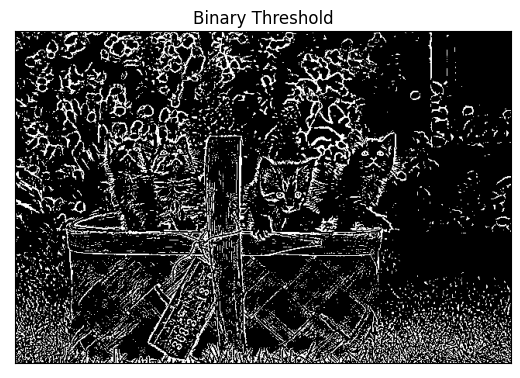

In [59]:
# Adoatuve thresholding
# OpenCv can find the optimial value for threshold
thresh_img = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 10) # block_size = kernel size for mean, C value regularization constant
cvu.cv_imshow("Binary Threshold", thresh_img)

In [60]:
# Compute a operation over the neighbouring pixels minimizing some objective function

### Edge detection

#### Gradient & Edge detections

In [66]:
img = cv.imread("../opencv-course/Resources/Photos/park.jpg")

In [67]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

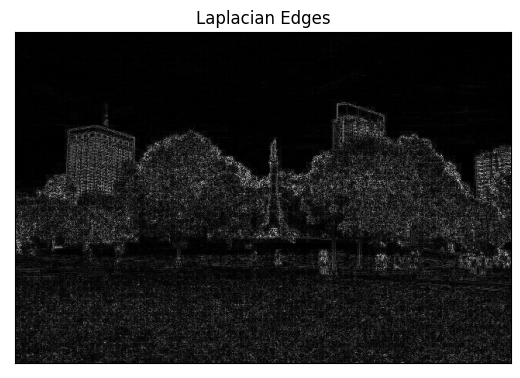

In [68]:
# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cvu.cv_imshow("Laplacian Edges", lap)

In [69]:
# Laplacian
sobel_x = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobel_y = cv.Sobel(gray, cv.CV_64F, 0, 1)

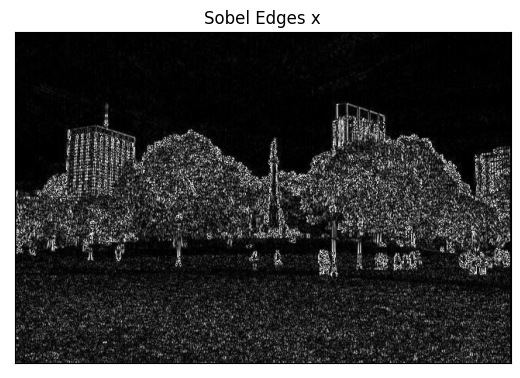

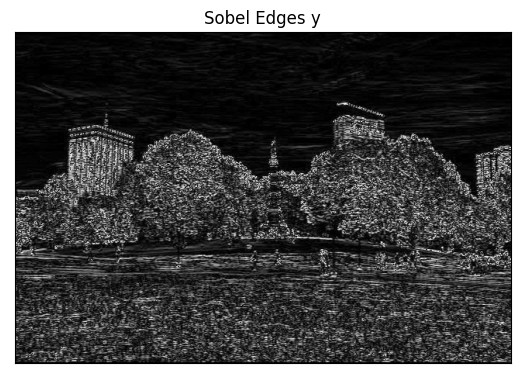

In [70]:
cvu.cv_imshow("Sobel Edges x", np.uint8(np.absolute(sobel_x)))
cvu.cv_imshow("Sobel Edges y", np.uint8(np.absolute(sobel_y)))

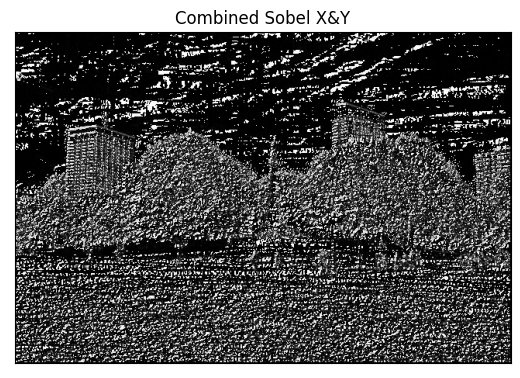

In [71]:
combined_sobel = np.uint8(cv.bitwise_and(sobel_x, sobel_y))
cvu.cv_imshow("Combined Sobel X&Y", combined_sobel) 

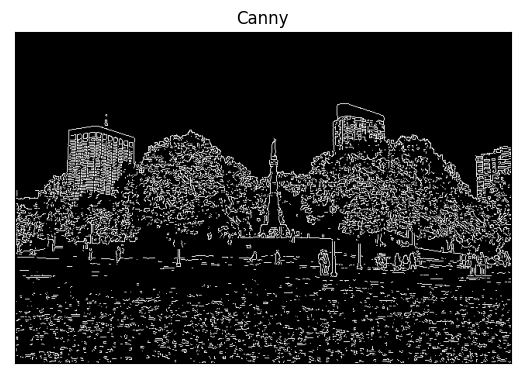

In [73]:
canny = cv.Canny(gray, 150, 175)
cvu.cv_imshow("Canny", canny)

In [ ]:
# Canny is an advanced method that uses Sobel as a step*
# In most cases you'll see a canny use. But some times a sobel a lot. Not necessary a laplacian